In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Mavic2_df=pd.read_csv('data/2018_04_19_Mavic2.csv')

In [3]:
print(Mavic2_df.head()) 

   Id  Time(seconds) Time(text)   Latitude   Longitude FlightMode  \
0   1            0.7    0m 0.7s  36.500569  126.337392      P-GPS   
1   2            0.8    0m 0.8s  36.500569  126.337392      P-GPS   
2   3            0.9    0m 0.9s  36.500569  126.337392      P-GPS   
3   4            1.0      0m 1s  36.500569  126.337392      P-GPS   
4   5            1.1    0m 1.1s  36.500569  126.337392      P-GPS   

  Altitude(feet)  Altitude(meters)  HSpeed(mph)  HSpeed(m/s)  ...  RcAileron  \
0              0               0.0          0.0          0.0  ...       1024   
1              0               0.0          0.0          0.0  ...       1024   
2              0               0.0          0.0          0.0  ...       1024   
3              0               0.0          0.0          0.0  ...       1024   
4              0               0.0          0.0          0.0  ...       1024   

   RcElevator RcGyro  RcRudder  RcThrottle  NonGpsError  GoHomeStatus  AppTip  \
0        1024   1024   

Mavic FC does not store all time values of datetime64 format.

In [4]:
Mavic2_df['Time(seconds)']=pd.to_datetime(Mavic2_df['Time(seconds)'], unit='s', origin='2018-04-19')

In [5]:
Mavic2_df['Time(seconds)'] = Mavic2_df['Time(seconds)'] + pd.Timedelta(hours=11) + pd.Timedelta(minutes=25)

In [6]:
Mavic2_df['Time(seconds)']

0      2018-04-19 11:25:00.700
1      2018-04-19 11:25:00.800
2      2018-04-19 11:25:00.900
3      2018-04-19 11:25:01.000
4      2018-04-19 11:25:01.100
                 ...          
5421   2018-04-19 11:35:00.500
5422   2018-04-19 11:35:00.600
5423   2018-04-19 11:35:00.700
5424   2018-04-19 11:35:00.800
5425   2018-04-19 11:35:00.900
Name: Time(seconds), Length: 5426, dtype: datetime64[ns]

In [7]:
Mavic2_df.dtypes

Id                                  int64
Time(seconds)              datetime64[ns]
Time(text)                         object
Latitude                          float64
Longitude                         float64
FlightMode                         object
Altitude(feet)                     object
Altitude(meters)                  float64
HSpeed(mph)                       float64
HSpeed(m/s)                       float64
GpsSpeed(mph)                     float64
GpsSpeed(m/s)                     float64
HomeDistance(feet)                 object
HomeDistance(meters)              float64
HomeLatitude                      float64
HomeLongitude                     float64
GpsCount                            int64
GpsLevel                            int64
BatteryPower(%)                     int64
BatteryVoltage                    float64
BatteryVoltageDeviation           float64
BatteryCell1Voltage               float64
BatteryCell2Voltage               float64
BatteryCell3Voltage               

In [8]:
Mavic2_df = Mavic2_df.set_index('Time(seconds)')

In [9]:
print(Mavic2_df.index.is_unique)

True


In [10]:
Mavic2_df["average_alt"]= Mavic2_df["Altitude(meters)"].rolling(60).mean()

<AxesSubplot:xlabel='Time(seconds)'>

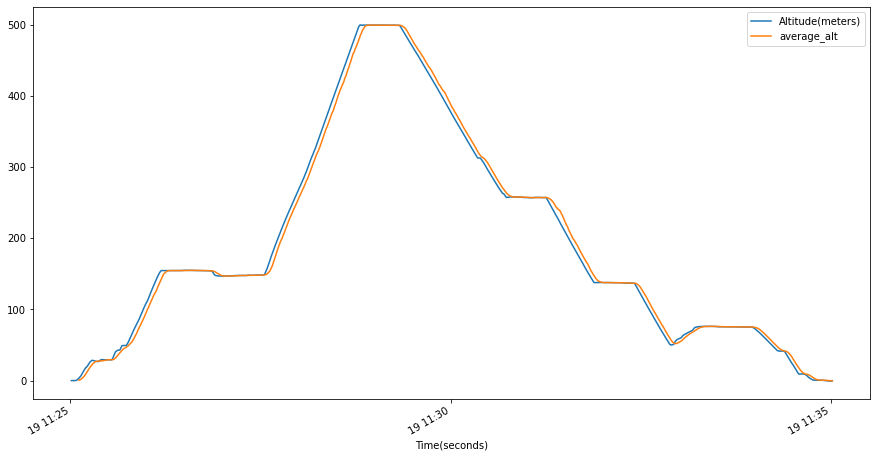

In [11]:
Mavic2_df.iloc[:, [6, -1]].plot(figsize = (15, 8))

In [12]:
# Assuming 'Mavic2_df' is a DataFrame containing columns 'VelocityX', 'VelocityY', and 'VelocityZ'
Mavic2_df['Total_Velocity'] = np.sqrt(Mavic2_df['VelocityX']**2 + Mavic2_df['VelocityY']**2 + Mavic2_df['VelocityZ']**2)


In [13]:
Mavic2_df["Velocity"]= Mavic2_df["Total_Velocity"].rolling(10).mean()

<AxesSubplot:xlabel='Time(seconds)'>

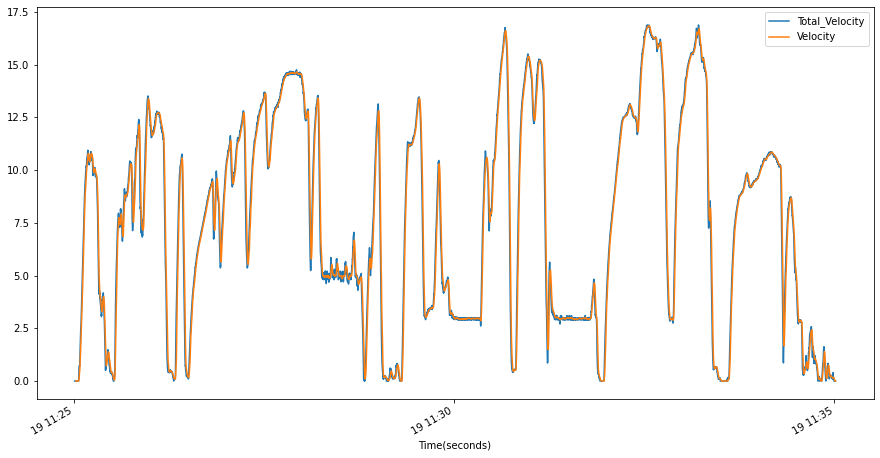

In [14]:
Mavic2_df.loc[:, ['Total_Velocity', 'Velocity']].plot(figsize = (15, 8))

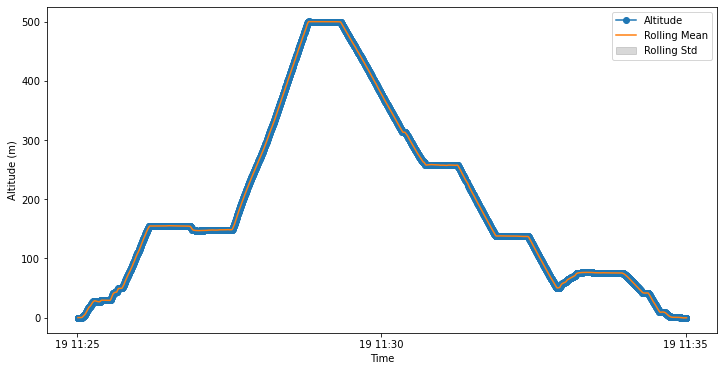

In [15]:
# Choose the window size for rolling analysis (e.g., 3 data points)
window_size = 3

# Perform rolling analysis on altitude data
Mavic2_df['rolling_mean'] = Mavic2_df['Altitude(meters)'].rolling(window=window_size).mean()
Mavic2_df['rolling_std'] = Mavic2_df['Altitude(meters)'].rolling(window=window_size).std()

# Create a plot with the altitude data, rolling mean, and rolling standard deviation
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mavic2_df.index, Mavic2_df['Altitude(meters)'], label='Altitude', marker='o')
ax.plot(Mavic2_df.index, Mavic2_df['rolling_mean'], label='Rolling Mean', linestyle='--')
ax.fill_between(Mavic2_df.index, Mavic2_df['rolling_mean'] - Mavic2_df['rolling_std'], Mavic2_df['rolling_mean']
                + Mavic2_df['rolling_std'], color='gray', alpha=0.3, label='Rolling Std')

ax.set_xlabel('Time')
ax.set_ylabel('Altitude (m)')
ax.legend()

plt.show()


In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [17]:
print(Mavic2_df[['rolling_std', 'rolling_mean']])

                         rolling_std  rolling_mean
Time(seconds)                                     
2018-04-19 11:25:00.700          NaN           NaN
2018-04-19 11:25:00.800          NaN           NaN
2018-04-19 11:25:00.900     0.000000      0.000000
2018-04-19 11:25:01.000     0.000000      0.000000
2018-04-19 11:25:01.100     0.000000      0.000000
2018-04-19 11:25:01.200     0.000000      0.000000
2018-04-19 11:25:01.300     0.000000      0.000000
2018-04-19 11:25:01.400     0.000000      0.000000
2018-04-19 11:25:01.500     0.000000      0.000000
2018-04-19 11:25:01.600     0.000000      0.000000
2018-04-19 11:25:01.700     0.000000      0.000000
2018-04-19 11:25:01.800     0.000000      0.000000
2018-04-19 11:25:01.900     0.000000      0.000000
2018-04-19 11:25:02.000     0.000000      0.000000
2018-04-19 11:25:02.100     0.000000      0.000000
2018-04-19 11:25:02.200     0.000000      0.000000
2018-04-19 11:25:02.300     0.000000      0.000000
2018-04-19 11:25:02.400     0.0

#### 고도 데이터의 롤링 평균 및 표준 편차를 분석할 때 이러한 값의 갑작스러운 또는 상당한 변화를 관찰하여 잠재적인 고도 유지 시스템 문제 또는 돌풍과 같은 외부 요인을 식별할 수 있습니다. 다음은 평균 및 표준 편차 값을 해석하는 데 도움이 되는 몇 가지 단계입니다.

##### 1) 롤링 평균의 급격한 변화 확인: 고도 유지 시스템이 올바르게 작동하는 경우 롤링 평균은 상대적으로 안정적으로 유지되거나 시간이 지남에 따라 점진적으로 변경되어야 합니다. 롤링 평균의 급격한 변화는 고도 유지 시스템에 문제가 있거나 돌풍과 같은 외부 요인을 나타낼 수 있습니다. 예를 들어 롤링 평균이 이전 값보다 훨씬 높거나 낮게 점프하는 경우 문제가 있음을 나타낼 수 있습니다.
##### 2) 롤링 표준 편차를 관찰하십시오. 높은 표준 편차는 고도 값이 분산되어 있고 일관성이 없음을 나타내는 반면, 낮은 표준 편차는 고도 값이 평균에 가깝고 상대적으로 안정적임을 나타냅니다. 롤링 표준 편차가 갑자기 증가하거나 지속적으로 높게 유지되면 센서 부정확성 또는 제어 루프 문제와 같은 고도 유지 시스템에 문제가 있거나 급격한 고도 변화를 유발하는 돌풍과 같은 외부 요인이 있음을 나타낼 수 있습니다.
####  3) 이동 평균 및 표준 편차를 기준 값과 비교: 정상 작동 조건에 대한 기준 값(예: 허용 가능한 평균 및 표준 편차 값)이 있는 경우 이동 평균 및 표준 편차를 이 값과 비교할 수 있습니다. 관찰된 값이 기준 값에서 크게 벗어나면 고도 유지 시스템 또는 외부 요인에 잠재적인 문제가 있음을 나타낼 수 있습니다.
####  4) 다른 데이터와의 상관 관계 조사: 풍속, 모터 온도 또는 센서 판독값과 같은 다른 드론 비행 데이터와 함께 고도 데이터의 롤링 평균 및 표준 편차를 조사할 수도 있습니다. 고도 변화와 다른 데이터 간의 상관관계를 찾으면 고도 변동이 시스템 문제로 인한 것인지 외부 요인으로 인한 것인지 판단하는 데 도움이 될 수 있습니다.
####  5) 데이터 시각화: 고도 데이터, 롤링 평균 및 표준 편차를 그래프에 표시하면 패턴을 시각화하고 잠재적인 문제를 보다 쉽게 ​​식별할 수 있습니다. Matplotlib 또는 Seaborn과 같은 Python 라이브러리를 사용하여 데이터의 시각화를 만들 수 있습니다.
#### 6) 이러한 단계는 드론의 고도에 영향을 미치는 잠재적인 문제 또는 요인을 식별하도록 안내하기 위한 것입니다. 관찰된 이상 현상의 근본 원인을 확인하기 위해 추가 분석 또는 테스트를 수행해야 할 수 있습니다.

##### 롤링 평균과 롤링 표준 편차는 데이터의 다른 측면을 나타내므로 직접 비교할 수 없다는 점을 명확히 하는 것이 중요합니다. 롤링 평균은 지정된 창에 대한 평균 고도를 나타내는 반면 롤링 표준 편차는 동일한 창 내에서 고도 데이터의 분산 또는 변동성을 측정합니다.


##### 롤링 표준 편차가 낮으면(즉, 창 내의 고도 값이 롤링 평균에 가까움) 고도 변동이 거의 없음을 나타낼 수 있으며 이는 강한 돌풍이나 고도 유지 시스템 문제가 없음을 시사할 수 있습니다. 그 기간 동안. 그러나 다른 요인도 낮은 표준 편차에 기여할 수 있으므로 이는 최종 결론이 아닙니다.


##### 롤링 평균 및 표준 편차 값을 해석할 때 드론 비행의 컨텍스트, 특정 드론 시스템 및 환경을 고려하는 것이 필수적입니다. 돌풍이나 고도 유지 시스템에 문제가 있는지 확인하기 위해 풍속 및 풍향, 모터 온도, 센서 판독값과 같은 기타 관련 데이터를 분석하는 것도 중요합니다.


##### 요약하면 낮은 롤링 표준 편차는 분석된 창 동안 돌풍 또는 고도 유지 시스템 문제로 인해 상당한 고도 변동이 없음을 나타낼 수 있습니다. 그러나 결론을 내리기 전에 다른 요인과 데이터를 고려하는 것이 중요합니다.

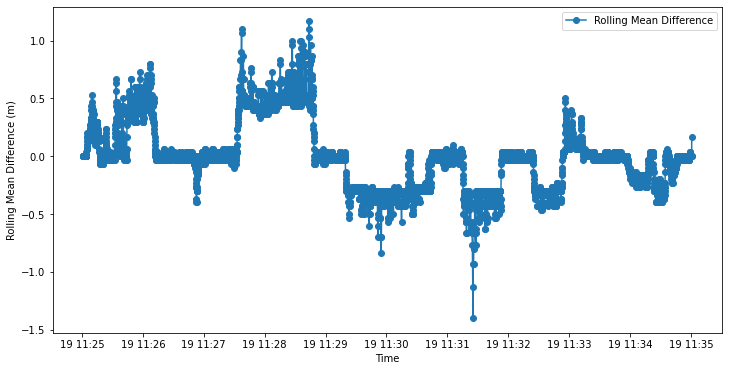

In [18]:
df=Mavic2_df
# Choose the window size for rolling analysis (e.g., 3 data points)
window_size = 3

# Perform rolling analysis on altitude data
df['rolling_mean'] = df['Altitude(meters)'].rolling(window=window_size).mean()

# Calculate the rolling mean difference
df['rolling_mean_diff'] = df['rolling_mean'].diff()

# Create a plot with the rolling mean difference
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figsize parameter to set the desired figure size

ax.plot(df.index, df['rolling_mean_diff'], label='Rolling Mean Difference', marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Rolling Mean Difference (m)')
ax.legend()

plt.show()


##### 이 프로그램은 diff() 함수를 사용하여 롤링 평균 차이를 계산하고 DataFrame에 새 열 'rolling_mean_diff'를 추가함
##### 그런 다음 x축은 시간을 나타내고 y축은 롤링 평균 차이(미터)를 나타내는 롤링 평균 차이를 표시함.

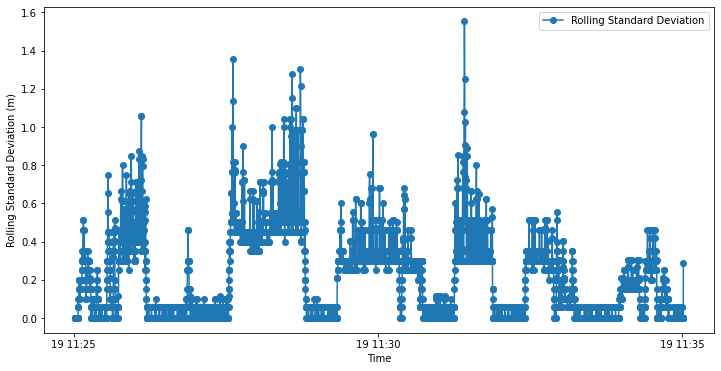

In [19]:
# Create a plot with the rolling standard deviation
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mavic2_df.index, Mavic2_df['rolling_std'], label='Rolling Standard Deviation', marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Rolling Standard Deviation (m)')
ax.legend()

plt.show()
